# Recommendation System

- [Exploratory Data Analysis](#0)   
    * Simple exploratory on the data structure and values
- [Modeling](#1)
    * Testing out vectorize text and find similar positions based on job description
- [Finalizing](#2)
    * Considering requirements
    
## [Text Clustering](#Cluster)

In [177]:
import numpy as np 
import pandas as p
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/user-skill-details/mockdata.csv
/kaggle/input/google-job-skills/job_skills.csv


In [178]:
df = pd.read_csv('../input/google-job-skills/job_skills.csv')

In [179]:
data = pd.read_csv('../input/user-skill-details/mockdata.csv', header=None, skiprows=1)
data = data.drop(data.columns[0], axis=1)
data

,1,2,3,4,5,6
0,"Python, JavaScript, SQL, HTML, CSS","Team Collaboration, Leadership",Software Engineering Intern at TechCorp,Front-End Developer at WebWorks,AWS Certified Solutions Architect,"Personal Budget Tracker, Portfolio Website"
1,"Java, C++, Ruby, SQL, AWS","Communication, Problem-Solving",Cloud Solutions Intern at CloudWave,Software Developer at DevSolutions,Certified Scrum Master (CSM),"E-commerce Platform, Chat Application"
2,"PHP, JavaScript, MySQL, Docker, Kubernetes","Conflict Resolution, Adaptability",Web Development Intern at CodeBase,Full-Stack Developer at AppForge,Docker Certified Associate,"Task Management Tool, API Integration"
3,"HTML, CSS, React, Node.js, Git","Teamwork, Time Management",UI/UX Design Intern at DesignGuru,UI Developer at PixelPerfect,React Certified Developer,"Interactive Resume, Social Media Dashboard"
4,"Swift, Objective-C, Xcode, Firebase, REST APIs","Empathy, Active Listening",Mobile App Development Intern at AppLab,iOS Developer at AppCraft,Apple Certified iOS Developer,"Fitness Tracker App, News Aggregator"
5,"C#, .NET, SQL Server, Azure, Entity Framework","Negotiation, Initiative",Software Development Intern at SoftTech,.NET Developer at TechSolutions,Microsoft Certified: Azure Developer,"CRM System, Inventory Management System"
6,"Python, R, TensorFlow, Scikit-learn, Machine Learning","Analytical Thinking, Mentoring",Data Science Intern at DataInsight,Data Scientist at Insight Analytics,Certified Data Scientist (CDS),"Predictive Analytics Tool, Sentiment Analysis"
7,"JavaScript, Angular, TypeScript, MongoDB, Express.js","Collaboration, Creativity",Full-Stack Development Intern at Webify,Web Developer at CodeCreations,Angular Certified Developer,"Blogging Platform, Real-time Chat App"
8,"Go, Ruby on Rails, PostgreSQL, Redis, Elasticsearch","Strategic Thinking, Adaptability",Backend Development Intern at ServerWorks,Backend Developer at CodeBase,Ruby Association Certified Ruby Developer,"API for Social Media, Search Engine"
9,"Java, Scala, Spark, Hadoop, Big Data","Project Management, Presentation",Data Engineering Intern at BigDataPro,Data Engineer at DataMasters,Cloudera Certified Associate,"Data Pipeline, Real-time Analytics System"


In [180]:
data = data.applymap(lambda x: str(x).replace('"', '') if pd.notna(x) else x)

# Convert each line (row) into a single string of words
skillInfo = data.apply(lambda row: ' '.join(str(word) for word in row if pd.notna(word)), axis=1)

# Print the resulting strings
for line in skillInfo:
    print(line)
    print()

Python, JavaScript, SQL, HTML, CSS Team Collaboration, Leadership Software Engineering Intern at TechCorp Front-End Developer at WebWorks AWS Certified Solutions Architect Personal Budget Tracker, Portfolio Website

Java, C++, Ruby, SQL, AWS Communication, Problem-Solving Cloud Solutions Intern at CloudWave Software Developer at DevSolutions Certified Scrum Master (CSM) E-commerce Platform, Chat Application

PHP, JavaScript, MySQL, Docker, Kubernetes Conflict Resolution, Adaptability Web Development Intern at CodeBase Full-Stack Developer at AppForge Docker Certified Associate Task Management Tool, API Integration

HTML, CSS, React, Node.js, Git Teamwork, Time Management UI/UX Design Intern at DesignGuru UI Developer at PixelPerfect React Certified Developer Interactive Resume, Social Media Dashboard

Swift, Objective-C, Xcode, Firebase, REST APIs Empathy, Active Listening Mobile App Development Intern at AppLab iOS Developer at AppCraft Apple Certified iOS Developer Fitness Tracker Ap

## [Exploratory Data Analysis](#0)

**Knowing more about the data**

- Starting from the columns
- Then, the text pattern in columns
- Finally, the correlation between different positions

In [181]:
df.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills."
1,Google,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Shanghai, China","Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational issues with material, process, fixtures, equipment, etc. during the NPI phase to enable delivery of a mature product and manufacturing process into mass production. Support/drive continuous improvement efforts in the supply chain.\nLead suppliers by providing technical direction to establish and validate (utilizing statistical tools) process capability during the NPI phase for consistently delivering a quality product in mass production.\nUtilize DOE’s, FMEA and other Industry standard tools to proactively identify and address risks and optimize process parameters.","BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.","BSEE, BSME or BSIE degree.\nExperience of using Statistics tools for Data analysis, e.g. distribution histogram/pareto chart, process control chart, Design of Experiment (DOE), Correlation Analysis, etc.\nDemonstrated knowledge in PCBA manufacturing process and quality control.\nFamilar with cable/connector related components' manufacturing: moldling, stamping, die-casting, LIM, MIM process and materials.\nSelf starter with innovation, integrity and attention to detail.\nAbility to travel up to 50% of the time"
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to d

In [182]:
# Modifying the column name so that we can use df.column_name more easily
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

In [183]:
df.Company.value_counts()

Google     1227
YouTube    23  
Name: Company, dtype: int64

In [184]:
df.Category.value_counts()

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 101
Business Strategy                   98 
People Operations                   86 
User Experience & Design            84 
Program Management                  74 
Partnerships                        60 
Product & Customer Support          50 
Legal & Government Relations        46 
Administrative                      40 
Sales Operations                    31 
Software Engineering                31 
Hardware Engineering                26 
Real Estate & Workplace Services    25 
Manufacturing & Supply Chain        16 
Technical Infrastructure            11 
Network Engineering                 6  
Developer Relations                 5  
IT & Data Management                5  
Technical Writing                   5  
Data Center & Network               2  
Name: Category, dtype: int64

In [185]:
df.Location.value_counts()[:10]

Mountain View, CA, United States    190
Sunnyvale, CA, United States        155
Dublin, Ireland                     87 
New York, NY, United States         70 
London, United Kingdom              62 
San Francisco, CA, United States    49 
Singapore                           41 
Tokyo, Japan                        31 
Sydney, Australia                   31 
San Bruno, CA, United States        28 
Name: Location, dtype: int64

In [186]:
df['Country'] = df['Location'].apply(lambda x : x.split(',')[-1])

In [187]:
df.Country.value_counts()[:10]

 United States     638
 Ireland           87 
 United Kingdom    62 
 Germany           54 
Singapore          41 
 China             38 
 Australia         35 
 Japan             31 
 Taiwan            30 
 India             28 
Name: Country, dtype: int64

In [188]:
pd.isnull(df).sum()

Company                     0 
Title                       0 
Category                    0 
Location                    0 
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
Country                     0 
dtype: int64

In [189]:
df = df.dropna(how='any',axis='rows')

## [Modeling](#1)

In [190]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

scaler = MaxAbsScaler()

model = NMF(n_components=100)

normalizer = Normalizer()

# Creating a pipeline: pipeline
pipeline = make_pipeline(scaler,model,normalizer)

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors_Responsibilities = vectorizer.fit_transform(df['Responsibilities'])

In [192]:
Responsibilities = pipeline.fit_transform(vectors_Responsibilities)

In [193]:
df_Responsibilities = pd.DataFrame(Responsibilities,index=df['Title'])

In [194]:
df_Responsibilities.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Title,,,,,,,,,,,,,,,,,,,,,
Google Cloud Program Manager,0.0,0.184077,0.000000,0.0,0.0,0.071837,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.27551,0.000000,0.0,0.190623,0.651587,0.00000,0.004023
"Supplier Development Engineer (SDE), Cable/Connector",0.0,0.000000,0.008259,0.0,0.0,0.082623,0.0,0.027927,0.0,0.0,...,0.070861,0.0,0.345127,0.00000,0.062265,0.0,0.000000,0.099343,0.00654,0.000000


In [221]:
# Extract the second column (index 1) and convert to a list
roles = df.iloc[:, 1].tolist()

In [196]:
from collections import defaultdict

def generateValidJob(roles, s):
    result = []
    # Split the input string into words
    roleMatchCount = defaultdict(int)
    words = set(s.split())
    
    # Check if any word in the string matches any role in the list
    for role in roles:
        # If a word in the role matches any word in the string, return the role
        if any(word in words for word in role.split()):
            result.append(role)

    return result

In [197]:
import random

eligibleJobs = generateValidJob(roles, skillInfo[0])
jobTitle = random.choice(eligibleJobs)
print(jobTitle)

Software Engineering Manager, G Suite


In [198]:
pd.set_option('display.max_colwidth', -1)
print(df[df.Title.str.contains(jobTitle)]['Title'])

255    Software Engineering Manager, G Suite
Name: Title, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [199]:
Position = df_Responsibilities.loc[jobTitle]

In [200]:
similarities_1[:3]

Title
Google Cloud Program Manager                                             0.499871
Supplier Development Engineer (SDE), Cable/Connector                     0.053687
Data Analyst, Product and Tools Operations, Google Technical Services    0.100815
dtype: float64

In [201]:
print(similarities_1.nlargest())

Title
Customer Experience Data Scientist, Google Cloud Support    1.000000
Data Analyst, Trust and Safety                              0.544007
Compensation Analyst                                        0.542157
Data Insights Analyst, Trust and Safety                     0.541730
Marketing Analyst, Product Growth                           0.537567
dtype: float64


In [222]:
type(similarities_1)
print(similarities_1)

Title
Google Cloud Program Manager                                             0.499871
Supplier Development Engineer (SDE), Cable/Connector                     0.053687
Data Analyst, Product and Tools Operations, Google Technical Services    0.100815
Developer Advocate, Partner Engineering                                  0.000343
Program Manager, Audio Visual (AV) Deployments                           0.301718
                                                                           ...   
Global Investigator                                                      0.165423
Campus Security Manager                                                  0.154475
Facilities Manager                                                       0.188907
Physical Security Manager                                                0.005141
Physical Security Manager                                                0.000000
Length: 1235, dtype: float64


### Considering the part of requirements.

In [203]:
vectorizer_Requirements = TfidfVectorizer()
vectors_Requirements = vectorizer_Requirements.fit_transform(df['Minimum_Qualifications'])

In [204]:
Requirements = pipeline.fit_transform(vectors_Requirements)

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [205]:
df_Requirementss = pd.DataFrame(Requirements,index=df['Title'])

In [206]:
Position = df_Requirementss.loc[jobTitle]

In [207]:
similarities_2 = df_Responsibilities.dot(Position)

In [208]:
print(similarities_2.nlargest())

Title
Inside Sales Manager Japan, Google Cloud                        0.886307
Inside Sales Manager North Asia, Google Cloud (English)         0.886129
Cloud Manager (German), Inside Sales                            0.885665
Inside Sales Manager, Google Cloud                              0.875414
Head of South East Asia Inside Sales, Google Cloud (English)    0.807206
dtype: float64


Though this looks a bit weird, let's see how we put responsibilities and requirements together first.

In [209]:
similarities_1

Title
Google Cloud Program Manager                                             0.499871
Supplier Development Engineer (SDE), Cable/Connector                     0.053687
Data Analyst, Product and Tools Operations, Google Technical Services    0.100815
Developer Advocate, Partner Engineering                                  0.000343
Program Manager, Audio Visual (AV) Deployments                           0.301718
                                                                           ...   
Global Investigator                                                      0.165423
Campus Security Manager                                                  0.154475
Facilities Manager                                                       0.188907
Physical Security Manager                                                0.005141
Physical Security Manager                                                0.000000
Length: 1235, dtype: float64

In [210]:
similarities_1.rename("similarity")
similarities_2.rename("similarity")

similarities_1.to_frame().join(similarities_2.to_frame(),lsuffix='1')

,01,0
Title,,
"APAC Accounting Lead, Non-Ads Products",0.091781,0.016425
"APAC Manager, Employment Tax",0.227911,0.025143
"APAC SMB Account Manager, Google Cloud (Mandarin, Cantonese)",0.148407,0.027817
AR and VR Writer,0.084638,0.038727
ASIC Physical Design Engineering Tech Lead & Manager,0.126079,0.064355
...,...,...
"Web Solutions Engineer, Product and Tools Operations",0.100044,0.017608
"Web Solutions Engineer, Product and Tools Operations",0.100044,0.017608
"Web Solutions Engineer, Product and Tools Operations",0.100044,0.017608


In [211]:
similarities_overall = (2 * similarities_1) + similarities_2

In [212]:
print(similarities_overall.nlargest())

Title
Customer Experience Data Scientist, Google Cloud Support     2.108946
Data Insights Analyst, Trust and Safety                      1.181965
Compensation Analyst                                         1.164971
Publisher Intelligence Analyst, Online Partnerships Group    1.147210
Marketing Analyst, Product Growth                            1.130586
dtype: float64


In [213]:
df[np.isin(df['Title'],similarities_overall.nlargest(3).index.tolist())].head()

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country
277,Google,"Customer Experience Data Scientist, Google Cloud Support",Program Management,"New York, NY, United States","Create, design and maintain reusable datasets with appropriate architecture to deal with high level of data input complexity.\nProvide analytical decision making support for key projects when it comes to providing customer experience (CX) insights. Research new ways of modeling data proactively to unlock actionable customer insights or improve processes.\nContribute to the development of the analytical frameworks, tools, and skills for the Google Cloud Support team.\nWork with internal teams to translate data and model results into tactical and strategic insights that are clear, complete, accurate and relevant. Be able to provide insights that are understandable and applicable to decision making and meets the needs of varying client audiences; research new algorithms and methods for optimizing quality and support experience improvements.\nPartner with cross-functional Business Intelligence teams, as well as non-technical stakeholders, to help frame problems, document and prioritize data science requirements. Communicate results of complex technical work clearly.","MBA/MS/MA degree with a quantitative focus (economics, computer science, mathematics, physics, engineering, statistics, or accounting)\n5 years of quantitative analytics experience with a focus on data analysis, statistical modeling, machine learning, and/or predictive analytics.\nExperience with statistical software (e.g., R, S-Plus, SAS, or similar).\nExperience with databases and scripting languages (e.g., Python).","PhD degree with a quantitative focus (economics, computer science, mathematics, physics, engineering, statistics, or accounting)\nProven experience delivering bespoke analytics to senior stakeholders (problem scoping/definition, modeling, interpretation, presentation)\nExperience in a multi-channel client/customer support environment (e.g., email, phone, chat, social).\nAbility to consistently deliver quality outputs in a high paced and dynamic environment, work through ambiguity, with an ability to work to tight deadlines.\nDemonstrated ability to build strong relationships at all levels as a cross-functional influencer.\nStrong oral and written communication skills, including the ability to communicate complex findings in a structured and clear manner to technical and non-technical audiences.",United States
336,Google,"Data Insights Analyst, Trust and Safety",Product & Customer Support,"Dublin, Ireland","Investigate abuse and operational trends, or useful ML features based on big data sets.\nOptimize process workflows with production-level pipelines and documentation.\nAnalyze and prioritize various data feeds to reveal top issues, recommend and influence action, liaise with cross-functional teams and stakeholders (Engineering, Policy, Sales, Legal, etc.) to drive the resolution of challenges.\nDesign and prototype dashboards to provide insights at scale that meet the needs of management.\nCommunicate insights on a regular basis to the appropriate level of management.","BA/BS degree in Science, Engineering, Mathematics, Statistics, Economics or equivalent practical experience in an analytics role.\nExperience analyzing data using database query (e.g. SQL). Experience with spreadsheets and statistical modeling.","Experience in one or more of the following areas: fraud and risk management, data analytics packages (e.g. R, Python w/Pandas, NumPy, SciPy), machine learning, statistical and quantitative modeling.\nKnowledge of web-research, online advertising, fraud detection and e-commerce.\nKnowledge of one or more programming languages.\nAbility to manage multiple projects simultaneously in a fast paced and dynamic environment..\nDemonstrated business acumen with project management skills.\nDistinctive problem-solving, analytical 

## [Text Clustering](#Clustering)

#### Purpose: Aiming at finding the relevant words, skills, requirements across different roles using Cluster Analysis.

In [214]:
from scipy.cluster.vq import kmeans, vq
from numpy import random

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en.stop_words import STOP_WORDS

In [215]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [216]:
stop_words_0 = set(stopwords.words('english')) 
stop_words = ['and', 'in', 'of', 'or', 'with','to','on','a']

def remove_noise(text):
    tokens = word_tokenize(text)
    clean_tokens = []
    lemmatizer=WordNetLemmatizer()
    for token in tokens:
        token = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', token)
        token = lemmatizer.lemmatize(token.lower())
        if len(token) > 1 and token not in stop_words_0 and token not in stop_words:
            clean_tokens.append(token)
            
    return clean_tokens

In [217]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100,tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Minimum_Qualifications'])

In [218]:
random.seed = 123

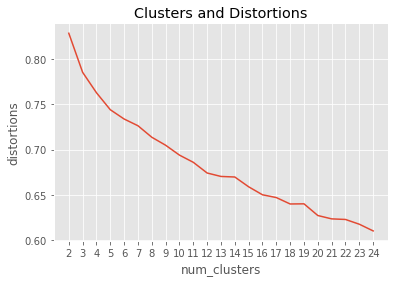

In [223]:
distortions = []
num_clusters = range(2, 25)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(tfidf_matrix.todense(),i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Clusters and Distortions')
plt.show()

In [224]:
cluster_centers, distortion = kmeans(tfidf_matrix.todense(),13)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(13):
    # Sort the terms and print top 10 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:5])

['experience', 'management', 'consulting', 'year', 'project']
['design', 'experience', 'interaction', 'year', 'related']
['experience', 'science', 'computer', 'related', 'technical']
['marketing', 'experience', 'year', 'equivalent', 'medium']
['2018', 'june', 'program', 'december', 'expected']
['partner', 'experience', 'market', 'business', 'management']
['experience', 'equivalent', 'babs', 'practical', 'degree']
['cloud', 'computing', 'experience', 'technical', 'customer']
['technology', 'experience', 'industry', 'sale', 'year']
['speak', 'fluently', 'idiomatically', 'write', 'english']
['student', 'internship', '2018', 'fulltime', 'program']
['currently', 'program', 'design', 'enrolled', 'internship']
['relevant', 'experience', 'work', 'year', 'equivalent']
